In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
sys.path.append("..")
from src.config import *

# Globals
RANDOM_STATE = 1

In [2]:
df_path = os.path.join(CONFIG["paths"]["datasets"], "train_001-003.feather")
df = pd.read_feather(df_path)
#df["dataset_id"] = df["speaker_id"] + "_" + df["video_id"] + "_" + df["clip_id"]
#df = df.set_index("dataset_id")
df = df.dropna()
df.head()

,id_00,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,slopeUV0-500_sma3nz_amean,slopeUV500-1500_sma3nz_amean,spectralFluxUV_sma3nz_amean,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,equivalentSoundLevel_dBp
dataset_id,,,,,,,,,,,,,,,,,,,,,
id00012__raOc3-IRsw_00110,-0.534247,0.446597,-0.702078,-0.141750,0.831408,0.281750,0.465406,-0.053199,-0.431032,0.456370,...,0.079656,-0.007927,0.371803,4.291045,3.402647,0.092778,0.071165,0.192353,0.095519,-23.302576
id00012__raOc3-IRsw_00110,-0.534247,0.446597,-0.702078,-0.141750,0.831408,0.281750,0.465406,-0.053199,-0.431032,0.456370,...,0.021874,0.006534,0.085932,3.980099,3.030303,0.236667,0.153261,0.079091,0.067750,-24.908430
id00012__raOc3-IRsw_00110,-0.534247,0.446597,-0.702078,-0.141750,0.831408,0.281750,0.465406,-0.053199,-0.431032,0.456370,...,-0.014360,-0.002919,0.179453,5.359662,3.698435,0.158077,0.106663,0.096400,0.087813,-26.076452
id00012__raOc3-IRsw_00110,-1.232415,0.044864,-0.898896,0.013484,0.286337,0.490515,0.026982,-0.587245,-0.265872,0.126442,...,0.079656,-0.007927,0.371803,4.291045,3.402647,0.092778,0.071165,0.192353,0.095519,-23.302576
id00012__raOc3-IRsw_00110,-1.232415,0.044864,-0.898896,0.013484,0.286337,0.490515,0.026982,-0.587245,-0.265872,0.126442,...,0.021874,0.006534,0.085932,3.980099,3.030303,0.236667,0.153261,0.079091,0.067750,-24.908430


In [3]:
id_df = df[[c for c in df.columns if "id_" in c]]

In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(id_df)

In [5]:
import umap

# Apply UMAP for 3D reduction
reducer = umap.UMAP(n_components=3, random_state=RANDOM_STATE, n_neighbors=100)
embedding_3d = reducer.fit_transform(X_scaled)

/home/chr1s/.conda/envs/acoustic-to-anthropometric/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


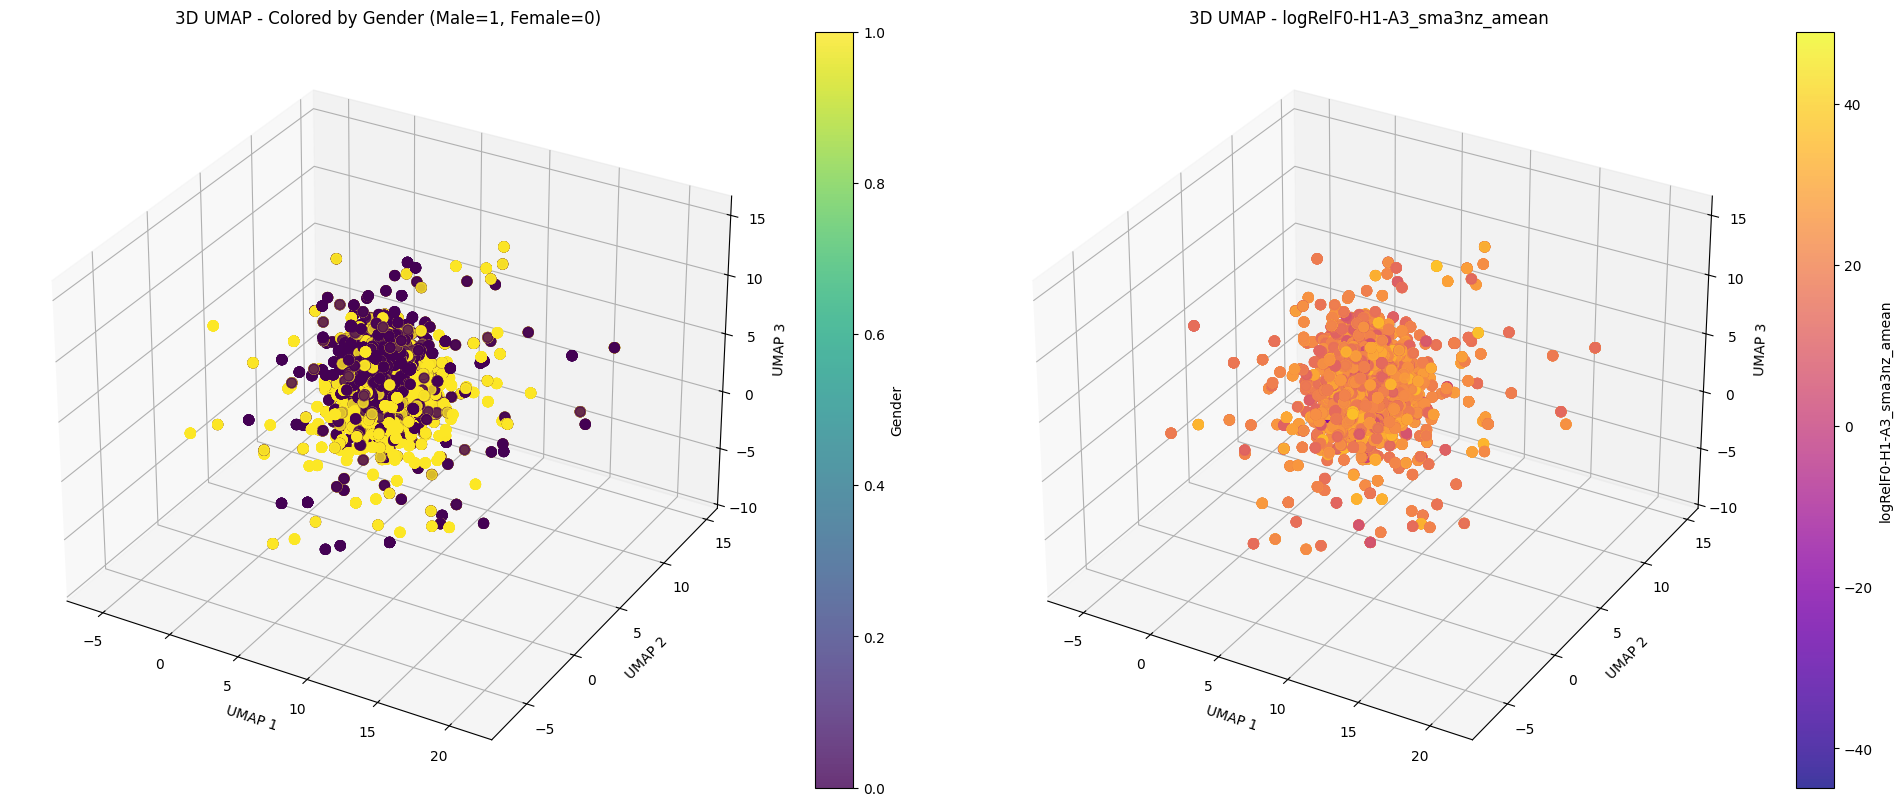

In [6]:
# Define both y values
y1 = df["gender"].str.contains("m").astype(float)
key2 = "logRelF0-H1-A3_sma3nz_amean"
y2 = df[key2]

# Create figure with two subplots
fig = plt.figure(figsize=(20, 8))

# First subplot - Gender-based coloring
ax1 = fig.add_subplot(121, projection="3d")
scatter1 = ax1.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
                      c=y1, cmap="viridis", s=50, alpha=0.8)
ax1.set_xlabel("UMAP 1")
ax1.set_ylabel("UMAP 2")
ax1.set_zlabel("UMAP 3")
ax1.set_title("3D UMAP - Colored by Gender (Male=1, Female=0)")
plt.colorbar(scatter1, ax=ax1, label="Gender")

# Second subplot - F0-based coloring
ax2 = fig.add_subplot(122, projection="3d")
scatter2 = ax2.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
                      c=y2, cmap="plasma", s=50, alpha=0.8)
ax2.set_xlabel("UMAP 1")
ax2.set_ylabel("UMAP 2")
ax2.set_zlabel("UMAP 3")
ax2.set_title(f"3D UMAP - {key2}")
plt.colorbar(scatter2, ax=ax2, label=key2)

plt.tight_layout()
plt.show()

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE for 3D reduction
reducer = TSNE(n_components=3, random_state=RANDOM_STATE, perplexity=10)
embedding_3d = reducer.fit_transform(X_scaled)

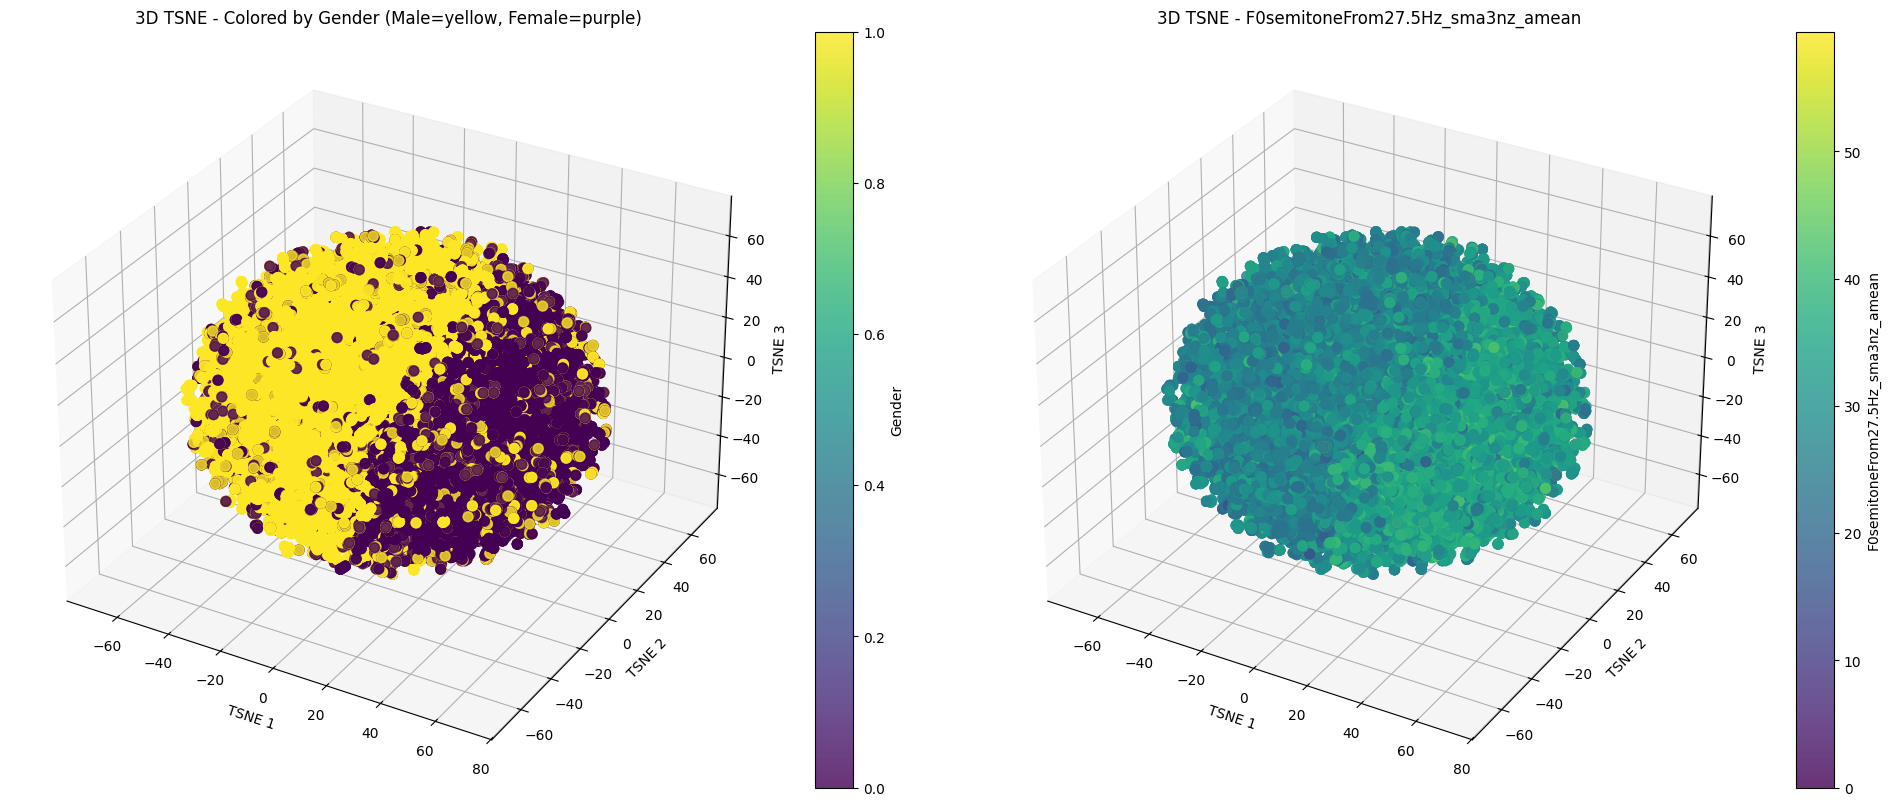

In [9]:
# Define both y values
y1 = df["gender"].str.contains("m").astype(float)
key2 = "F0semitoneFrom27.5Hz_sma3nz_amean"
y2 = df[key2]

# Create figure with two subplots
fig = plt.figure(figsize=(20, 8))

# First subplot - Gender-based coloring
ax1 = fig.add_subplot(121, projection="3d")
scatter1 = ax1.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
                      c=y1, cmap="viridis", s=50, alpha=0.8)
ax1.set_xlabel("TSNE 1")
ax1.set_ylabel("TSNE 2")
ax1.set_zlabel("TSNE 3")
ax1.set_title("3D TSNE - Colored by Gender (Male=yellow, Female=purple)")
plt.colorbar(scatter1, ax=ax1, label="Gender")

# Second subplot - F0-based coloring
ax2 = fig.add_subplot(122, projection="3d")
scatter2 = ax2.scatter(embedding_3d[:, 0], embedding_3d[:, 1], embedding_3d[:, 2],
                      c=y2, cmap="viridis", s=50, alpha=0.8)
ax2.set_xlabel("TSNE 1")
ax2.set_ylabel("TSNE 2")
ax2.set_zlabel("TSNE 3")
ax2.set_title(f"3D TSNE - {key2}")
plt.colorbar(scatter2, ax=ax2, label=key2)

plt.tight_layout()
plt.show()